<a href="https://colab.research.google.com/github/IlyaDenisov88/monitoring_system/blob/main/engines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
eleven_kw = pd.read_csv("/content/drive/MyDrive/LISA_comps/data_11kw_50Hz.csv", index_col=False, delimiter=",")
thirty_kw = pd.read_csv("/content/drive/MyDrive/LISA_comps/data_30kw_15Hz.csv", index_col=False, delimiter=",")

In [ ]:
eleven_kw.shape, thirty_kw.shape

((59906, 16), (67078, 16))

In [ ]:
eleven_kw.tail()

,Time,Device name,Acceleration X(g),Acceleration Y(g),Acceleration Z(g),X-axis vibration speed(mm/s),Y-axis vibration speed(mm/s),Z-axis vibration speed(mm/s),X-axis vibration displacement(um),Y-axis vibration displacement(um),Z-axis vibration displacement(um),X-axis frequency vibration frequency(Hz/s),Y-axis frequency vibration frequency(Hz/s),Z-axis frequency vibration frequency(Hz/s),Chip Time(),Temperature(℃)
59901,18:37:35.304,39ab78bf-4d7c-499c-99b4-b3af8529ae01,0.0,0.0,0.0,3,5,3,2,11,5,102.9,0.0,69.5,2025-01-01 17:41:01.514,25.17
59902,18:37:35.312,39ab78bf-4d7c-499c-99b4-b3af8529ae01,0.0,0.0,0.0,3,5,3,2,11,5,102.9,0.0,69.5,2025-01-01 17:41:01.524,25.17
59903,18:37:35.320,39ab78bf-4d7c-499c-99b4-b3af8529ae01,0.0,0.0,0.0,1,4,3,2,10,5,102.9,0.0,69.5,2025-01-01 17:41:01.532,25.17
59904,18:37:35.332,39ab78bf-4d7c-499c-99b4-b3af8529ae01,0.0,0.0,0.0,1,4,3,2,10,5,102.9,0.0,69.5,2025-01-01 17:41:01.540,25.17
59905,18:37:35.342,39ab78bf-4d7c-499c-99b4-b3af8529ae01,0.0,0.0,0.0,4,4,1,8,10,1,102.9,0.0,69.5,2025-01-01 17:41:01.552,25.18


## Обзор и анализ данных

Признаки: время измерения, ускорение (по трем осям) - всегда 0, скорость вибраций (по трем осям), смещение под действием вибраций (по трем осям), частота вибраций (по трем осям), время чипирования, температура.


In [ ]:
eleven_kw.isnull().sum()

,0
Time,0
Device name,0
Acceleration X(g),0
Acceleration Y(g),0
Acceleration Z(g),0
X-axis vibration speed(mm/s),0
Y-axis vibration speed(mm/s),0
Z-axis vibration speed(mm/s),0
X-axis vibration displacement(um),0
Y-axis vibration displacement(um),0


In [ ]:
eleven_kw.dtypes

,0
Time,object
Device name,object
Acceleration X(g),float64
Acceleration Y(g),float64
Acceleration Z(g),float64
X-axis vibration speed(mm/s),int64
Y-axis vibration speed(mm/s),int64
Z-axis vibration speed(mm/s),int64
X-axis vibration displacement(um),int64
Y-axis vibration displacement(um),int64


In [ ]:
eleven_kw["Time"] = pd.to_datetime(eleven_kw["Time"].str.strip(), format="%H:%M:%S.%f").dt.time
thirty_kw["Time"] = pd.to_datetime(thirty_kw["Time"].str.strip(), format="%H:%M:%S.%f").dt.time
eleven_kw["Chip Time()"] = pd.to_datetime(eleven_kw["Chip Time()"].str.strip(), format="%Y-%m-%d %H:%M:%S.%f").dt
thirty_kw["Chip Time()"] = pd.to_datetime(thirty_kw["Chip Time()"].str.strip(), format="%Y-%m-%d %H:%M:%S.%f").dt

### Описательные статистики

In [ ]:
eleven_kw.drop(["Acceleration X(g)", "Acceleration Y(g)", "Acceleration Z(g)"], axis=1).describe()

,X-axis vibration speed(mm/s),Y-axis vibration speed(mm/s),Z-axis vibration speed(mm/s),X-axis vibration displacement(um),Y-axis vibration displacement(um),Z-axis vibration displacement(um),X-axis frequency vibration frequency(Hz/s),Y-axis frequency vibration frequency(Hz/s),Z-axis frequency vibration frequency(Hz/s),Temperature(℃)
count,59906.000000,59906.000000,59906.000000,59906.000000,59906.000000,59906.000000,59906.000000,59906.000000,59906.000000,59906.000000
mean,2.302057,5.088889,3.485344,4.218209,20.683838,15.384686,83.663762,71.316932,70.424784,25.165732
std,1.257959,1.652579,1.107385,2.271092,11.271819,9.080103,74.780283,20.430228,21.967240,0.017122
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
25%,1.000000,4.000000,3.000000,3.000000,13.000000,9.000000,0.000000,66.100000,66.700000,25.160000
50%,2.000000,5.000000,4.000000,4.000000,18.000000,13.000000,85.800000,69.900000,69.600000,25.170000
75%,3.000000,6.000000,4.000000,6.000000,26.000000,20.000000,120.200000,75.800000,76.700000,25.170000
max,8.000000,10.000000,7.000000,16.000000,100.000000,96.000000,514.900000,147.100000,137.100000,25.180000


In [ ]:
thirty_kw.describe()

,Acceleration X(g),Acceleration Y(g),Acceleration Z(g),X-axis vibration speed(mm/s),Y-axis vibration speed(mm/s),Z-axis vibration speed(mm/s),X-axis vibration displacement(um),Y-axis vibration displacement(um),Z-axis vibration displacement(um),X-axis frequency vibration frequency(Hz/s),Y-axis frequency vibration frequency(Hz/s),Z-axis frequency vibration frequency(Hz/s),Temperature(℃)
count,67078.0,67078.0,67078.0,67078.000000,67078.000000,67078.000000,67078.000000,67078.000000,67078.000000,67078.000000,67078.000000,67078.0,67078.000000
mean,0.0,0.0,0.0,1.658532,0.659262,0.159605,6.980008,4.750783,4.106085,28.068164,1.459104,0.0,25.195597
std,0.0,0.0,0.0,0.858208,0.546837,0.366242,2.904193,2.722855,2.296587,21.600540,7.635734,0.0,0.023265
min,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,25.000000
25%,0.0,0.0,0.0,1.000000,0.000000,0.000000,5.000000,3.000000,3.000000,0.000000,0.000000,0.0,25.190000
50%,0.0,0.0,0.0,2.000000,1.000000,0.000000,7.000000,4.000000,4.000000,43.300000,0.000000,0.0,25.200000
75%,0.0,0.0,0.0,2.000000,1.000000,0.000000,9.000000,6.000000,5.000000,44.700000,0.000000,0.0,25.210000
max,0.0,0.0,0.0,4.000000,3.000000,1.000000,19.000000,18.000000,18.000000,54.200000,68.600000,0.0,25.220000


Вывод: на 11kw двигателе показатели вибраций: среднее, дисперсия перемещения, частоты вибрации в несколько раз выше, чем у двигателя 30 kW. Видим также, что у 11кВт есть вибрация по оси Z, а у 30кВт нет, что тоже может свидетельствовать о неисправностях в первом двигателе.

### Графики вибраций

#### Скорость

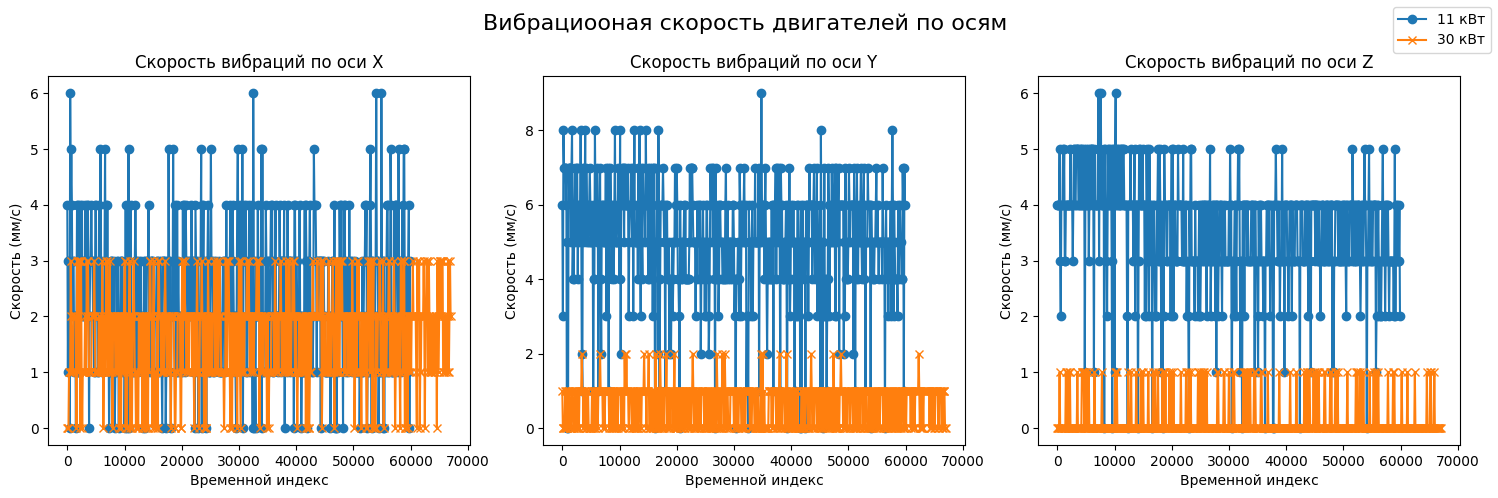

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(eleven_kw.index[::100], eleven_kw["X-axis vibration speed(mm/s)"][::100], marker="o", linestyle="-", label="11 кВт")
axs[0].plot(thirty_kw.index[::100], thirty_kw["X-axis vibration speed(mm/s)"][::100], marker="x", linestyle="-", label="30 кВт")
axs[0].set_title("Скорость вибраций по оси X")
axs[0].set_ylabel("Скорость (мм/с)")
axs[0].set_xlabel("Временной индекс")


axs[1].plot(eleven_kw.index[::100], eleven_kw["Y-axis vibration speed(mm/s)"][::100], marker="o", linestyle="-")
axs[1].plot(thirty_kw.index[::100], thirty_kw["Y-axis vibration speed(mm/s)"][::100], marker="x", linestyle="-")
axs[1].set_title("Скорость вибраций по оси Y")
axs[1].set_ylabel("Скорость (мм/с)")
axs[1].set_xlabel("Временной индекс")


axs[2].plot(eleven_kw.index[::100], eleven_kw["Z-axis vibration speed(mm/s)"][::100], marker="o", linestyle="-")
axs[2].plot(thirty_kw.index[::100], thirty_kw["Z-axis vibration speed(mm/s)"][::100], marker="x", linestyle="-")
axs[2].set_title("Скорость вибраций по оси Z")
axs[2].set_ylabel("Скорость (мм/с)")
axs[2].set_xlabel("Временной индекс")


fig.legend()

plt.suptitle("Вибрациооная скорость двигателей по осям", fontsize=16)
plt.tight_layout()
plt.show()


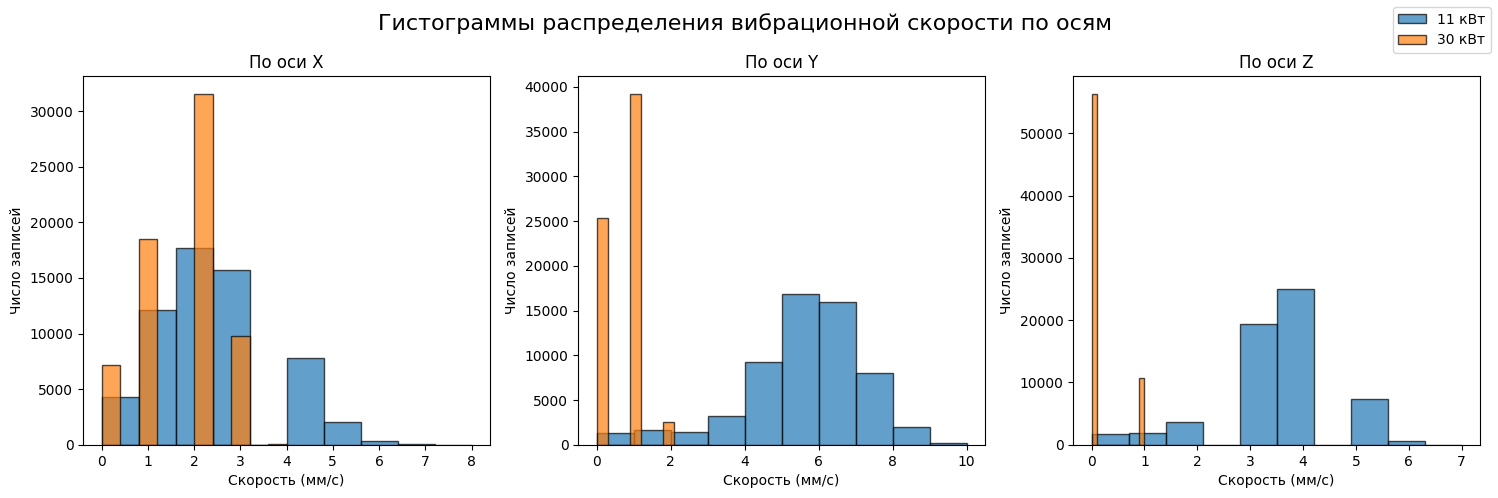

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].hist(eleven_kw["X-axis vibration speed(mm/s)"], bins=10, edgecolor='black', label = "11 кВт", alpha=0.7)
axs[0].hist(thirty_kw["X-axis vibration speed(mm/s)"], bins=10, edgecolor='black', label = "30 кВт", alpha=0.7)
axs[0].set_title("По оси X")
axs[0].set_xlabel("Скорость (мм/с)")
axs[0].set_ylabel("Число записей")


axs[1].hist(eleven_kw["Y-axis vibration speed(mm/s)"], bins=10, edgecolor='black', alpha=0.7)
axs[1].hist(thirty_kw["Y-axis vibration speed(mm/s)"], bins=10, edgecolor='black', alpha=0.7)
axs[1].set_title("По оси Y")
axs[1].set_xlabel("Скорость (мм/с)")
axs[1].set_ylabel("Число записей")


axs[2].hist(eleven_kw["Z-axis vibration speed(mm/s)"], bins=10, edgecolor='black', alpha=0.7)
axs[2].hist(thirty_kw["Z-axis vibration speed(mm/s)"], bins=10, edgecolor='black', alpha=0.7)
axs[2].set_title("По оси Z")
axs[2].set_xlabel("Скорость (мм/с)")
axs[2].set_ylabel("Число записей")


fig.legend()

plt.suptitle("Гистограммы распределения вибрационной скорости по осям", fontsize=16)
plt.tight_layout()
plt.show()

#### Смещение

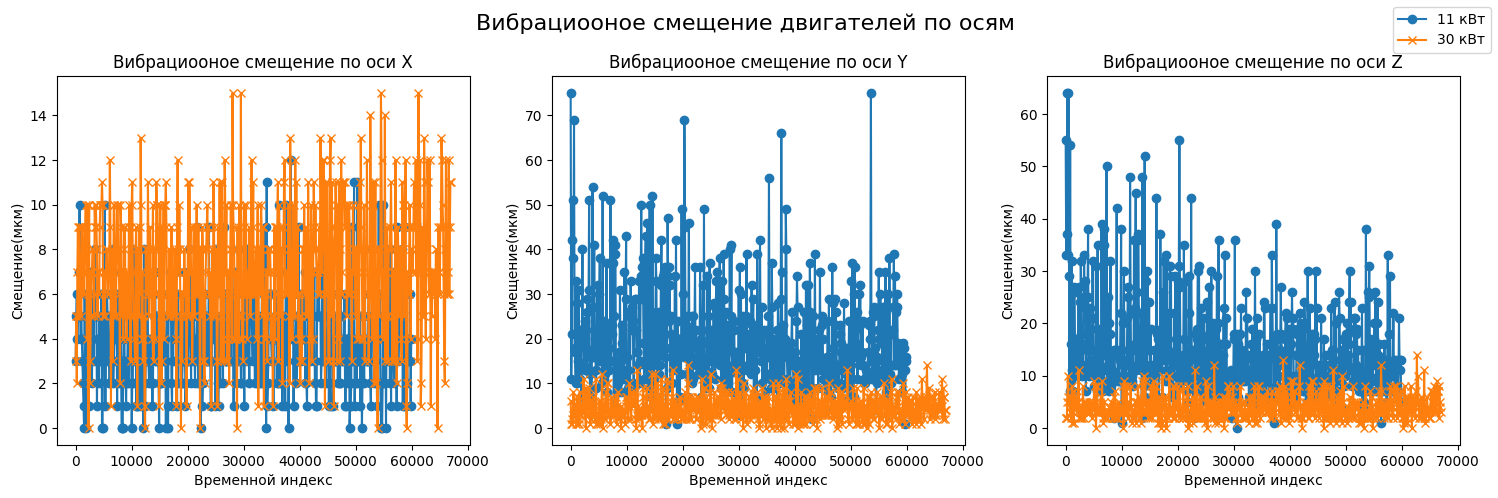

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(eleven_kw.index[::100], eleven_kw["X-axis vibration displacement(um)"][::100], marker="o", linestyle="-", label="11 кВт")
axs[0].plot(thirty_kw.index[::100], thirty_kw["X-axis vibration displacement(um)"][::100], marker="x", linestyle="-", label="30 кВт")
axs[0].set_title("Вибрациооное смещение по оси X")
axs[0].set_ylabel("Смещение(мкм)")
axs[0].set_xlabel("Временной индекс")


axs[1].plot(eleven_kw.index[::100], eleven_kw["Y-axis vibration displacement(um)"][::100], marker="o", linestyle="-")
axs[1].plot(thirty_kw.index[::100], thirty_kw["Y-axis vibration displacement(um)"][::100], marker="x", linestyle="-")
axs[1].set_title("Вибрациооное смещение по оси Y")
axs[1].set_ylabel("Смещение(мкм)")
axs[1].set_xlabel("Временной индекс")



axs[2].plot(eleven_kw.index[::100], eleven_kw["Z-axis vibration displacement(um)"][::100], marker="o", linestyle="-")
axs[2].plot(thirty_kw.index[::100], thirty_kw["Z-axis vibration displacement(um)"][::100], marker="x", linestyle="-")
axs[2].set_title("Вибрациооное смещение по оси Z")
axs[2].set_ylabel("Смещение(мкм)")
axs[2].set_xlabel("Временной индекс")

fig.legend()

plt.suptitle("Вибрациооное смещение двигателей по осям", fontsize=16)
plt.tight_layout()
plt.show()

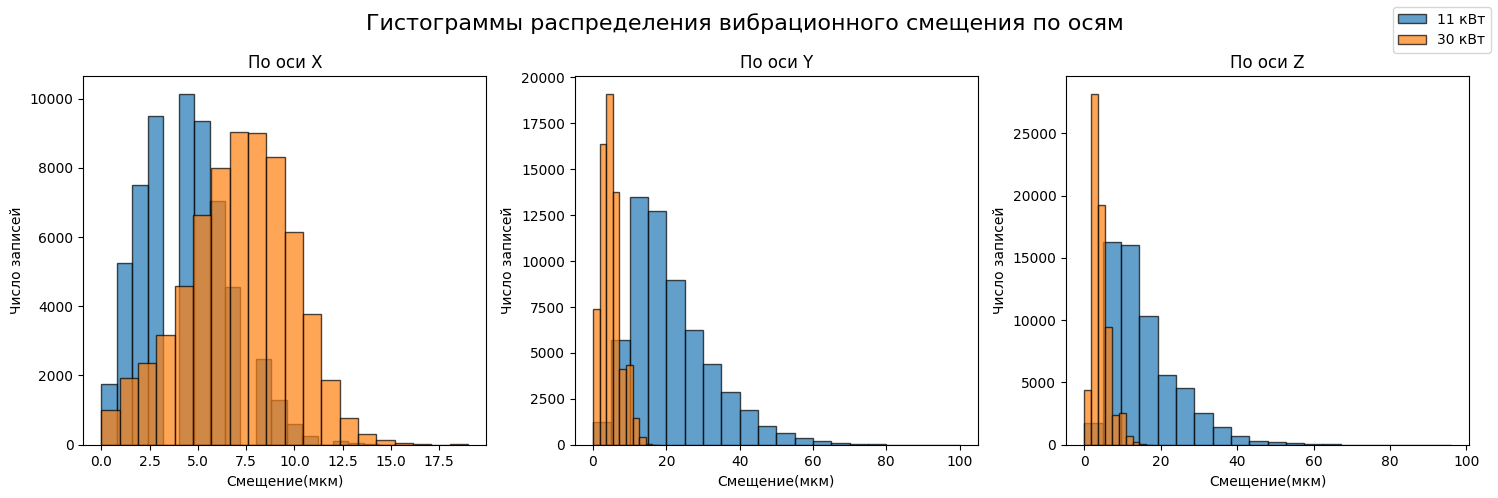

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].hist(eleven_kw["X-axis vibration displacement(um)"], bins=20, edgecolor='black', label = "11 кВт", alpha=0.7)
axs[0].hist(thirty_kw["X-axis vibration displacement(um)"], bins=20, edgecolor='black', label = "30 кВт", alpha=0.7)
axs[0].set_title("По оси X")
axs[0].set_xlabel("Смещение(мкм)")
axs[0].set_ylabel("Число записей")


axs[1].hist(eleven_kw["Y-axis vibration displacement(um)"], bins=20, edgecolor='black', alpha=0.7)
axs[1].hist(thirty_kw["Y-axis vibration displacement(um)"], bins=10, edgecolor='black', alpha=0.7)
axs[1].set_title("По оси Y")
axs[1].set_xlabel("Смещение(мкм)")
axs[1].set_ylabel("Число записей")


axs[2].hist(eleven_kw["Z-axis vibration displacement(um)"], bins=20, edgecolor='black', alpha=0.7)
axs[2].hist(thirty_kw["Z-axis vibration displacement(um)"], bins=10, edgecolor='black', alpha=0.7)
axs[2].set_title("По оси Z")
axs[2].set_xlabel("Смещение(мкм)")
axs[2].set_ylabel("Число записей")


fig.legend()

plt.suptitle("Гистограммы распределения вибрационного смещения по осям", fontsize=16)
plt.tight_layout()
plt.show()

#### Частота

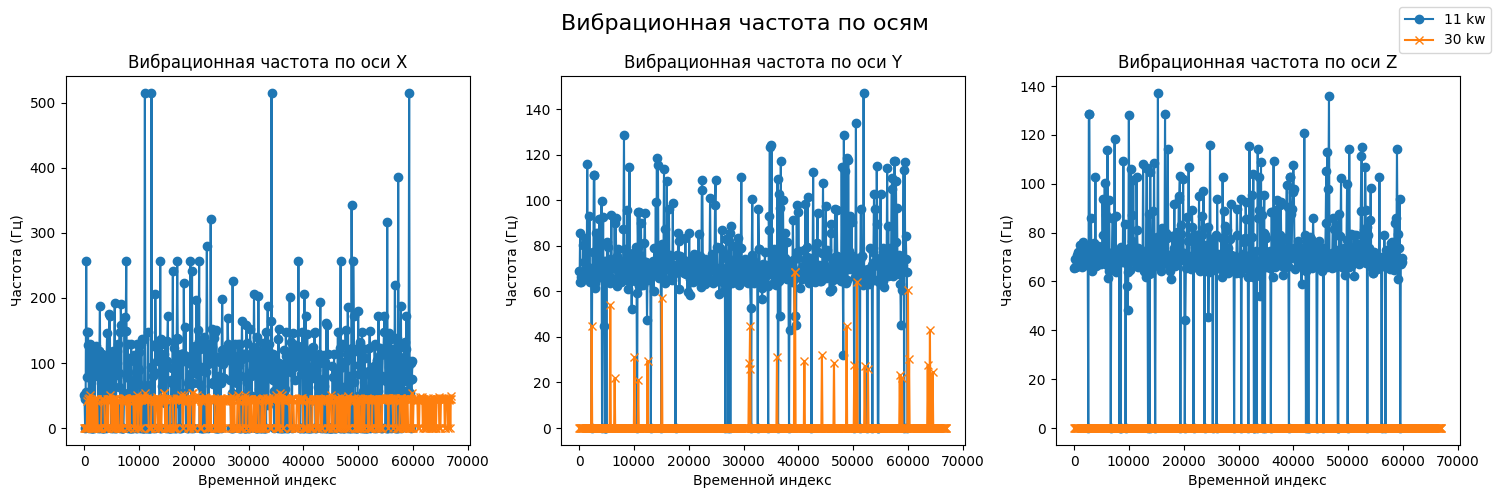

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(eleven_kw.index[::100], eleven_kw["X-axis frequency vibration frequency(Hz/s)"][::100], marker="o", linestyle="-", label="11 kw")
axs[0].plot(thirty_kw.index[::100], thirty_kw["X-axis frequency vibration frequency(Hz/s)"][::100], marker="x", linestyle="-", label="30 kw")
axs[0].set_title("Вибрационная частота по оси Х")
axs[0].set_ylabel("Частота (Гц)")
axs[0].set_xlabel("Временной индекс")


axs[1].plot(eleven_kw.index[::100], eleven_kw["Y-axis frequency vibration frequency(Hz/s)"][::100], marker="o", linestyle="-")
axs[1].plot(thirty_kw.index[::100], thirty_kw["Y-axis frequency vibration frequency(Hz/s)"][::100], marker="x", linestyle="-")
axs[1].set_title("Вибрационная частота по оси Y")
axs[1].set_ylabel("Частота (Гц)")
axs[1].set_xlabel("Временной индекс")


axs[2].plot(eleven_kw.index[::100], eleven_kw["Z-axis frequency vibration frequency(Hz/s)"][::100], marker="o", linestyle="-")
axs[2].plot(thirty_kw.index[::100], thirty_kw["Z-axis frequency vibration frequency(Hz/s)"][::100], marker="x", linestyle="-")
axs[2].set_title("Вибрационная частота по оси Z")
axs[2].set_ylabel("Частота (Гц)")
axs[2].set_xlabel("Временной индекс")


fig.legend()

plt.suptitle("Вибрационная частота по осям", fontsize=16)
plt.tight_layout()
plt.show()

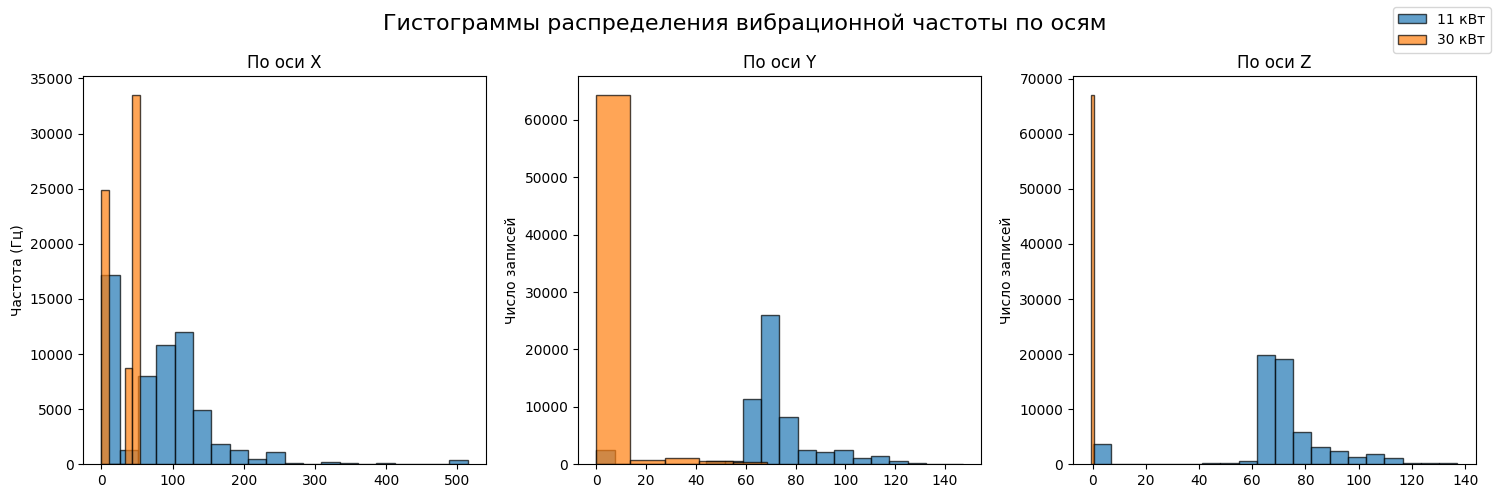

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].hist(eleven_kw["X-axis frequency vibration frequency(Hz/s)"], bins=20, edgecolor='black', label = "11 кВт", alpha=0.7)
axs[0].hist(thirty_kw["X-axis frequency vibration frequency(Hz/s)"], bins=5, edgecolor='black', label = "30 кВт", alpha=0.7)
axs[0].set_title("По оси X")
axs[0].set_ylabel("Частота (Гц)")
axs[0].set_ylabel("Число записей")


axs[1].hist(eleven_kw["Y-axis frequency vibration frequency(Hz/s)"], bins=20, edgecolor='black', alpha=0.7)
axs[1].hist(thirty_kw["Y-axis frequency vibration frequency(Hz/s)"], bins=5, edgecolor='black', alpha=0.7)
axs[1].set_title("По оси Y")
axs[0].set_ylabel("Частота (Гц)")
axs[1].set_ylabel("Число записей")


axs[2].hist(eleven_kw["Z-axis frequency vibration frequency(Hz/s)"], bins=20, edgecolor='black', alpha=0.7)
axs[2].hist(thirty_kw["Z-axis frequency vibration frequency(Hz/s)"], bins=1, edgecolor='black', alpha=0.7)
axs[2].set_title("По оси Z")
axs[0].set_ylabel("Частота (Гц)")
axs[2].set_ylabel("Число записей")


fig.legend()

plt.suptitle("Гистограммы распределения вибрационной частоты по осям", fontsize=16)
plt.tight_layout()
plt.show()

#### Вывод: по всем признакам, за исключением вибрационного смещения по оси X, вибриции для двигателя 11 kW (скорость, смещение, частота) больше по значению, а также имеют большую дисперсию по сравнению с признаками для двигателя 30 kW. Хотя на самом деле должно быть наоборот. Вероятно в двигателе 11 kW что-то не так.

### Корреляция

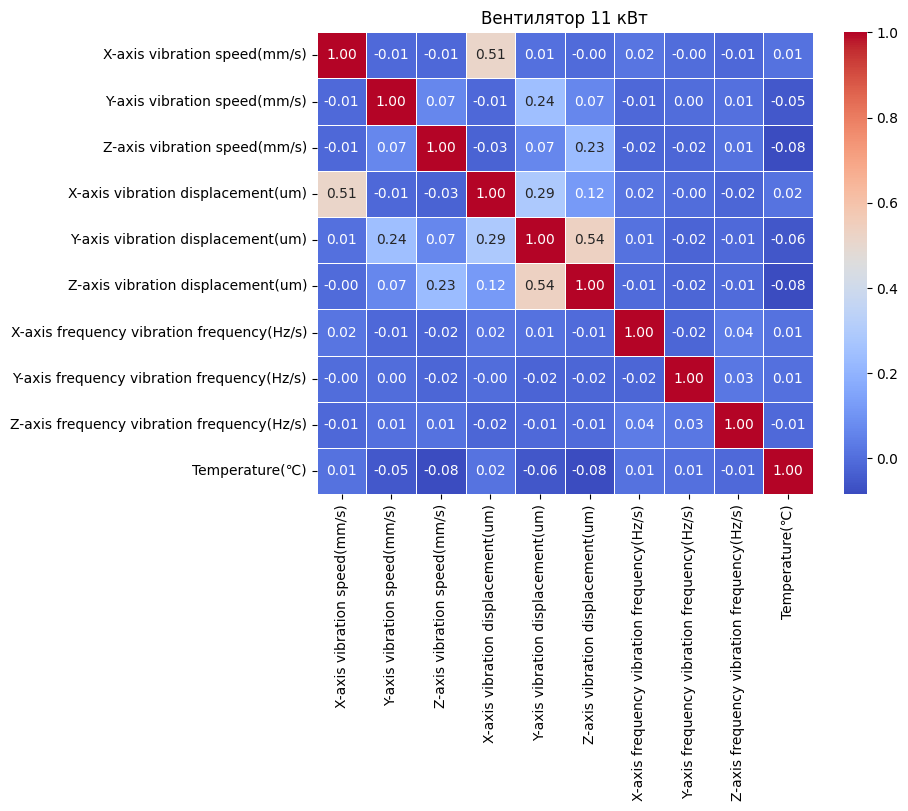

In [ ]:
corr_matrix = (eleven_kw.drop(["Chip Time()", "Time", "Device name", "Acceleration X(g)", "Acceleration Y(g)", "Acceleration Z(g)"], axis=1)).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Вентилятор 11 кВт")
plt.show()

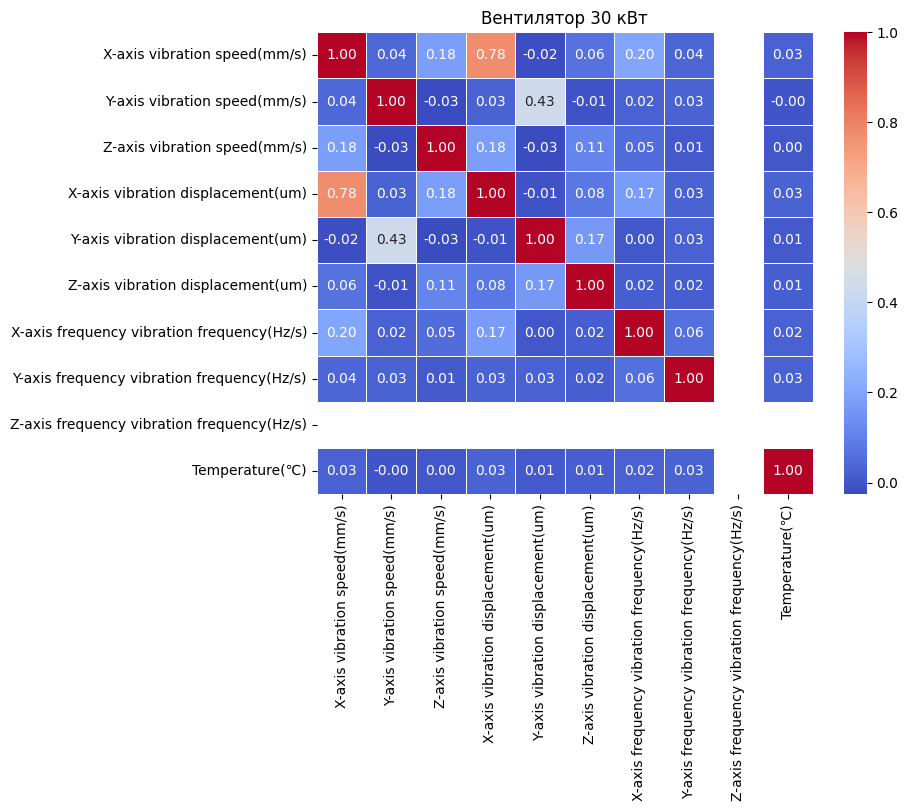

In [ ]:
corr_matrix = (thirty_kw.drop(["Chip Time()", "Time", "Device name", "Acceleration X(g)", "Acceleration Y(g)", "Acceleration Z(g)"], axis=1)).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Вентилятор 30 кВт")
plt.show()

Вывод: в данных 30кВт наблюдается сильная корреляция вибрационной скорости и смещения по оси Х (0.78), чуть меньшая по оси Y (0.43). В данных 11кВт же корреляция меньше, 0.51 по оси Х и 0.24 по оси Y. Также добавляется вибрация по оси Z.

## Постановка задачи: классификация неисправности / предсказание

Есть данные нескольких вентиляторов, нужно *понять что является неисправностью*, выяснить *каким образом параметры вибрации показывают неисправность*

#### Как разделить на классы (исправен/неисправен)? По каким параметрам?
1. Если хотим обучать модель - нужны данные для обучения. Нужно разметить данные.
2. Чтобы разметить нужно понять какая вибрация является критичной, а какая нормой, в зависимости от двигателя. Можно сделать разделение по работе двигателя. Например, у нас есть данные для двух двигателей: 30 W - работает исправно, норма. 11 W - неисправно. Тогда нужно больше данных по двигателям, которые работают исправно и больше данных по тем, которые работают плохо. Потом добавить в признаки характеристики, такие как мощность, напор и другие в зависимости от двигателя.
3. В любом случае, нам нужно больше данных по различным вентиляторам, можно поискать в Интернете или добавить синтетических данных.

#### Прогнозирование временного ряда
Есть вторая задача: есть данные с двигателя в реальном времени, есть прогноз на будущие параметры вибрации, если двигатель начинает работать с большей вибрацией - сигнал предупреждения. Только здесь не бинарная классификация, а по функции ошибки реальных данных от прогноза детектировать неисправность. Только также превышать критические значения нельзя будет ни в коем случае.

## Разделение данных по категриям (0-норма работы, 1-предупреждение) исходя из критических значений

Предельные значения скорости вибраций по ГОСТ. При испытаниях в заводских
условиях для вентиляторов BV-3 категории 2.8 мм/с для жесткой опоры и 3.5 для податливой. На месте эксплуатации: 4.5 мм/с для жесткой опоры и 6.3 для податливой.